In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager

font_path = '../Ruda/Ruda-VariableFont_wght.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [3]:
df = pd.read_excel('data/sensor_comparision.xlsx')

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df.iloc[:,1:]), columns=df.iloc[:,1:].columns)

In [5]:
df_normalized['Sample'] = df['Measure']

In [31]:
df_normalized['std'] = -1.01*df_normalized['std']

In [27]:
categories = ['Linearidade','\nPrecisão\t\t\t\t\t\t\t\t','\n\n\t\t\t\t\t\t\t\t\t\t\t\tSensibilidade']

C:\Users\pedro220068\AppData\Local\Temp\ipykernel_11108\3233196018.py:28: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\pedro220068\AppData\Local\Temp\ipykernel_11108\3233196018.py:29: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('results/comparative.svg',dpi=1000,transparent=True)


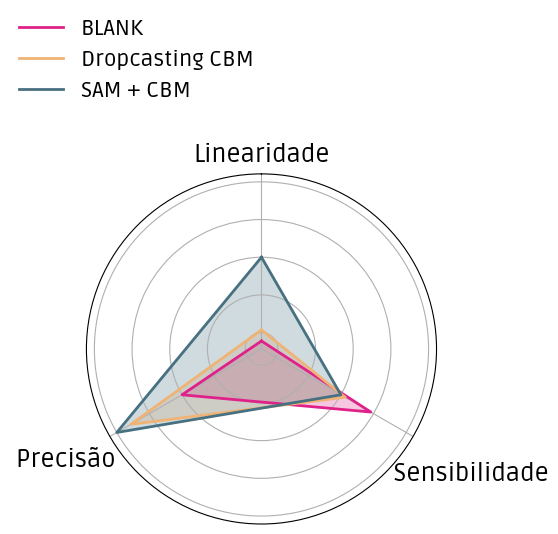

In [55]:
categories_plot = list(df_normalized.columns[:-1])
num_vars = len(categories_plot)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Criando o plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

color = ['#E0218A','#EFB475','#477081','#AEC5FB']

for i, row in df_normalized.iterrows():
    if row['Sample'] != 'BULK':
        values = row[:-1].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=row['Sample'], color=color[i])
        ax.fill(angles, values, alpha=0.25, color=color[i])

ax.set_theta_offset(np.pi/2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories,fontsize=18,fontweight='bold')
ax.grid(True)

# ax.set_ylim(-1,1)

plt.legend(fontsize=16, loc='upper left', bbox_to_anchor=(-0.25,1.5),framealpha=0)
plt.tight_layout()
plt.savefig('results/comparative.svg',dpi=1000,transparent=True)
plt.show()